In [15]:
%matplotlib inline

In [16]:
import numpy as np                     # Numerical algorithms on arrays
import cv2                             # OpenCV
from matplotlib import pyplot as plt   # Plot library
import matplotlib.cm as cm             # Image color map 
import tools                           # A few helpers to plot multiple images
from PIL import Image                  # For rescaling images
from ipywidgets import interact, fixed # Interact with images
from scipy.spatial import distance     # To compute euclidian distance
import pandas as pd

In [17]:
img_link = 'images/road_2.png'

annotation_link = 'annotations/road_2.txt'

In [18]:
data = pd.read_csv(annotation_link, header=None)

x1_annot = []
y1_annot = []
x2_annot = []
y2_annot = []

img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)
height, width = img.shape[:2]

H=height

for _, row in data.iterrows():
    x1_annot.append(int(row[0]))
    y1_annot.append(int(row[1]))
    x2_annot.append(int(row[2]))
    y2_annot.append(int(row[3]))

print(x1_annot,y1_annot,H)
    
number_lines = len(row)

[407, 459, 261, 423, 430, 470, 489, 444, 456, 583, 653, 652, 761, 566, 721, 717, 831, 826, 1153, 1152, 1154, 0, 962, 1153, 4, 1056, 1152, 382, 430] [666, 698, 543, 619, 603, 604, 616, 560, 557, 602, 635, 640, 595, 599, 662, 684, 683, 680, 499, 488, 444, 354, 591, 428, 330, 282, 68, 2, 0] 876


In [19]:
img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)
input_img = cv2.imread(img_link, cv2.IMREAD_GRAYSCALE)



iGausKernelSize = 11
imgFilt = cv2.GaussianBlur(img, (iGausKernelSize, iGausKernelSize), 0)

iReducFactor = 2
iStart = iReducFactor // 2
imgReduc = imgFilt[iStart::iReducFactor, iStart::iReducFactor]

# compute the median of the single channel pixel intensities
med = np.median( imgReduc)
    
# apply automatic Canny edge detection using the computed median
sigma = 0.3
loThreshold = int( max( 0, (1.0 - sigma) * med))
hiThreshold = int( min( 255, (1.0 + sigma) * med))

edges = cv2.Canny(imgReduc, loThreshold, hiThreshold, apertureSize=3, L2gradient=False)



Max_gap = 5
Min_length = 40
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),Min_length,Max_gap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(img,(2*x1,2*y1),(2*x2,2*y2),(0,255,0),3)

height, width = img.shape[:2]
mat = np.zeros((height,width))

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),Min_length,Max_gap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(mat,(2*x1,2*y1),(2*x2,2*y2),(255,255,255),3) 

iReducFactor = 2
iStart = iReducFactor // 2
blackReduc = mat[iStart::iReducFactor, iStart::iReducFactor]
blackReduc = blackReduc.astype('uint8')

img_and = cv2.bitwise_and(blackReduc, edges)

edges_negative = edges - img_and

dilated = cv2.dilate(img_and, np.ones((1,1), dtype=np.uint8))
colored = np.zeros((dilated.shape[0], dilated.shape[1], 3), dtype='uint8')

colored[:,:,0] = edges
colored[:,:,0] -= dilated
colored[:,:,1] = dilated

#cv2.imwrite('classification_building.png', colored)


In [20]:
img_color = cv2.imread(img_link, cv2.IMREAD_COLOR)

# to convert b,g,r cv2 picture into standard r,g,b format 
b,g,r = cv2.split(img_color)
img_color = cv2.merge( [r,g,b])

minLineLength = 20
maxLineGap = 1

lines = cv2.HoughLinesP(edges,1,np.pi/180,100,np.array([]),minLineLength,maxLineGap)
for l in lines:
    for x1,y1,x2,y2 in l:
        cv2.line(mat,(2*x1,2*y1),(2*x2,2*y2),(255, 255, 255),3)
        cv2.line(img_color,(2*x1,2*y1),(2*x2,2*y2),(255,0,0),3)

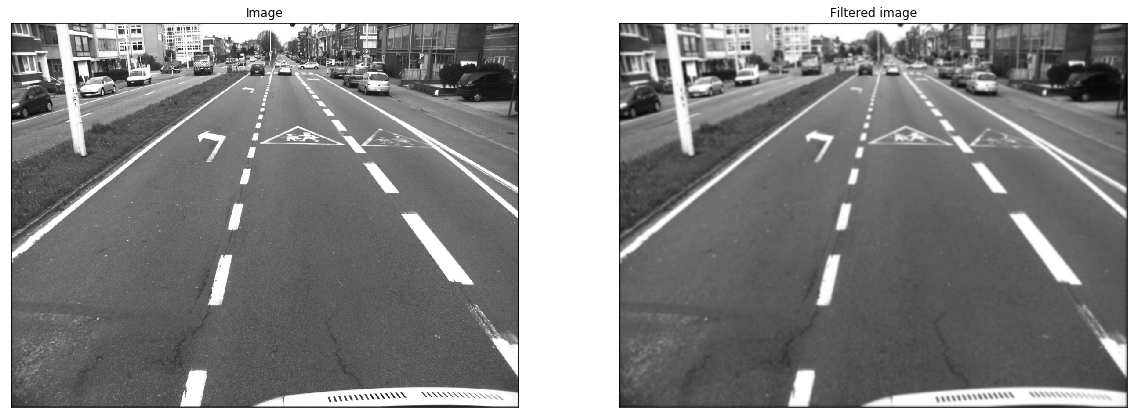

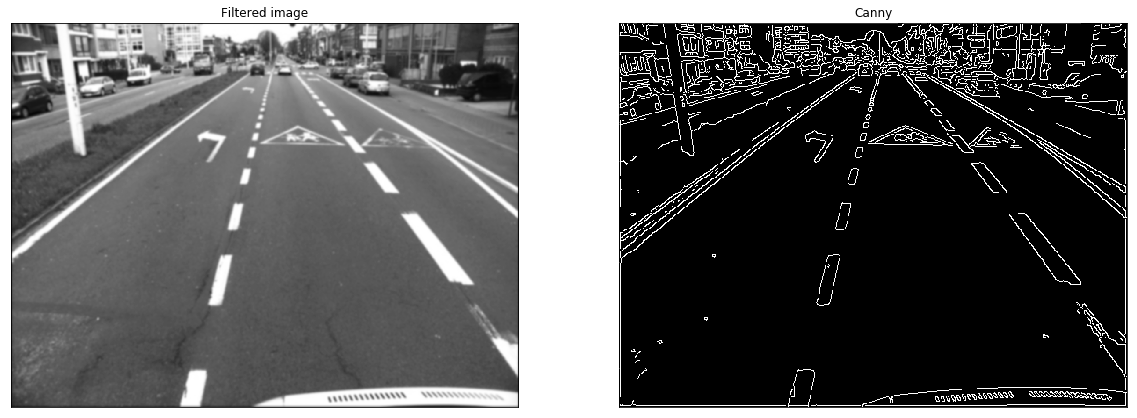

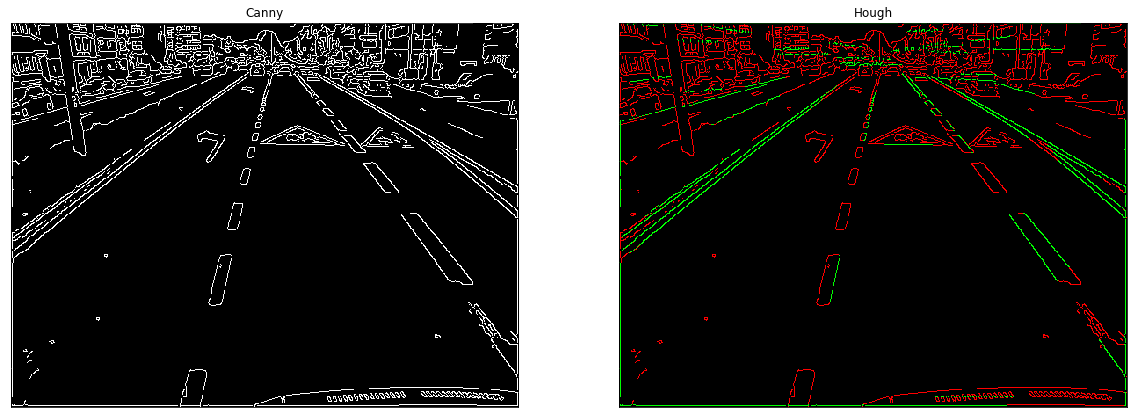

"\ncv2.imwrite('input.png', input_img)\ncv2.imwrite('blur.png', imgFilt)\ncv2.imwrite('edges.png', edges)\ncv2.imwrite('edges_dilated.png', edges_dilated)\ncv2.imwrite('colored.png', cv2.cvtColor(colored, cv2.COLOR_RGB2BGR))\ncv2.imwrite('image_lines.png', cv2.cvtColor(img_color, cv2.COLOR_RGB2BGR))\n"

In [21]:
tools.multiPlot(1, 2, (input_img, imgFilt), ('Image', 'Filtered image'), cmap_tuple=(cm.gray, cm.gray,))
tools.multiPlot(1, 2, (imgFilt, edges), ('Filtered image', 'Canny'), cmap_tuple=(cm.gray, cm.gray,))
tools.multiPlot(1, 2, (edges, colored), ('Canny', 'Hough'), cmap_tuple=(cm.gray, cm.gray,))

'''
cv2.imwrite('input.png', input_img)
cv2.imwrite('blur.png', imgFilt)
cv2.imwrite('edges.png', edges)
cv2.imwrite('edges_dilated.png', edges_dilated)
cv2.imwrite('colored.png', cv2.cvtColor(colored, cv2.COLOR_RGB2BGR))
cv2.imwrite('image_lines.png', cv2.cvtColor(img_color, cv2.COLOR_RGB2BGR))
'''

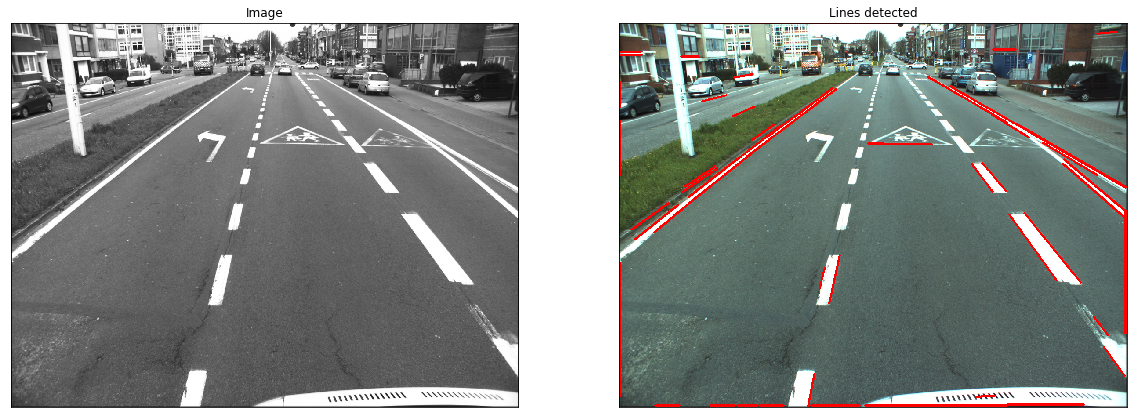

In [22]:
tools.multiPlot(1, 2, (input_img, img_color), ('Image', 'Lines detected'), cmap_tuple=(cm.gray, cm.gray,))

Pourcent of true positive pixels =  23.019431988041852 %
Pourcent of false positive pixels =  76.98056801195816 %
Pourcent of true negative pixels =  92.48747913188647 %
Pourcent of false negative pixels =  7.512520868113523 %
10 over 51 lines have been correctly detected


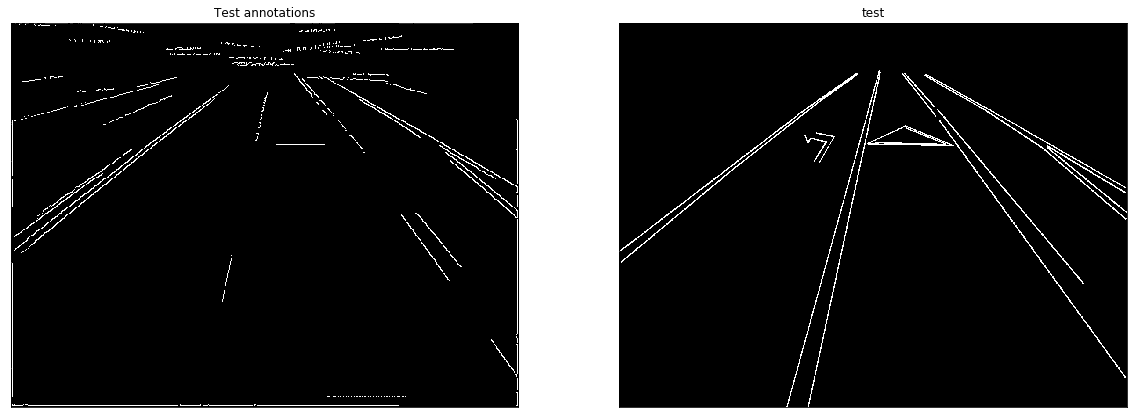

In [31]:
#height, width = img.shape[:2]
mat_annotations1 = np.zeros((height,width))

img_color = cv2.imread(img_link, cv2.IMREAD_COLOR)

b,g,r = cv2.split(img_color)
img_color = cv2.merge( [r,g,b])


#lines_annotations = lines#output of the annotations (expect a vector containing x1,y1,x2,y2 the coordinates of the vector ends)
for i in range(len(x1_annot)):
    cv2.line(mat_annotations1,(int(x1_annot[i]),H-int(y1_annot[i])),(int(x2_annot[i]),H-int(y2_annot[i])),(255, 255, 255),2) #peut-etre changer le 2*
    #cv2.line(img_color,(2*x1,2*y1),(2*x2,2*y2),(255,0,0),3) 

        
#Comparison between adaptive threshold and annotations
        
iReducFactor = 2
iStart = iReducFactor // 2
blackReduc_annotations = mat_annotations1[iStart::iReducFactor, iStart::iReducFactor]

blackReduc_annotations = blackReduc_annotations.astype('uint8') #photo noire contenant toutes les droites tracees dans les annotations

blackReduc_annotations_invert = (255-blackReduc_annotations)

true_positive = cv2.bitwise_and(img_and, blackReduc_annotations)

false_positive = cv2.bitwise_and(img_and, blackReduc_annotations_invert)

true_negative = cv2.bitwise_and(edges_negative, blackReduc_annotations_invert)

false_negative = cv2.bitwise_and(edges_negative, blackReduc_annotations)

num_pixels_detected_pos = cv2.countNonZero(img_and)

num_pixels_detected_neg = cv2.countNonZero(edges_negative)

num_true_positive = cv2.countNonZero(true_positive)

num_false_positive = cv2.countNonZero(false_positive)

num_true_negative = cv2.countNonZero(true_negative)

num_false_negative = cv2.countNonZero(false_negative)

pourcent_true_pos = num_true_positive/num_pixels_detected_pos

pourcent_false_pos = num_false_positive/num_pixels_detected_pos

pourcent_true_neg = num_true_negative/num_pixels_detected_neg

pourcent_false_neg = num_false_negative/num_pixels_detected_neg

print("Pourcent of true positive pixels = ", pourcent_true_pos*100, "%")
print("Pourcent of false positive pixels = ", pourcent_false_pos*100, "%")

print("Pourcent of true negative pixels = ", pourcent_true_neg*100, "%")
print("Pourcent of false negative pixels = ", pourcent_false_neg*100, "%")

#Comparison between Hough and annotations

good_lines_detected = 0
i=0
for ll in lines :
    mat = np.zeros((height,width))
    for x11,y11,x22,y22 in ll: 
        cv2.line(mat,(2*x11,2*y11),(2*x22,2*y22),(255, 255, 255),3)
        pixels_Hough=cv2.countNonZero(mat)
        num_pixels_in_common = cv2.countNonZero(cv2.bitwise_and(mat_annotations1, mat))
        #if num_pixels_in_common > 2000 :
        #    print(num_pixels_in_common,i)
        #    i=i+1
        if (num_pixels_in_common > 0.5*pixels_Hough or num_pixels_in_common > 0.5*pixels_annotations): 
            good_lines_detected = good_lines_detected + 1

print(good_lines_detected, "over", len(lines), "lines have been correctly detected")   

tools.multiPlot(1, 2, (img_and,mat_annotations1),
                        ('Test annotations','test'),
                        cmap_tuple=(cm.gray,cm.gray))